In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='x_Tvt-OQ-fi77vRyyCgr7CCPdH00M51I13a7NH0o-IxE',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'internshipproject-donotdelete-pr-koucx1m5daogox'
object_key = 'breastcancerdataset.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [3]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [4]:
ls -l

total 4
drwxrwx--- 4 wsuser wscommon 4096 Oct 29 11:39 breastcancerdataset/


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range =0.2,zoom_range = 0.2,horizontal_flip = True)

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
pwd

'/home/wsuser/work'

In [9]:
cd /home/wsuser/work/breastcancerdataset

/home/wsuser/work/breastcancerdataset


In [10]:
ls -l

total 8
drwxrwx--- 4 wsuser wscommon 4096 Oct 29 11:39 test/
drwxrwx--- 4 wsuser wscommon 4096 Oct 29 11:39 train/


In [11]:
x_train = train_datagen.flow_from_directory(r"/home/wsuser/work/breastcancerdataset/train", target_size=(64,64),batch_size=32,class_mode='binary')

Found 103 images belonging to 2 classes.


In [12]:
x_test = test_datagen.flow_from_directory(r"/home/wsuser/work/breastcancerdataset/test",target_size=(64,64),batch_size=32,class_mode='binary')

Found 22 images belonging to 2 classes.


In [13]:
len(x_test)

1

In [14]:
x_train.class_indices

{'benign': 0, 'malignant': 1}

# CNN

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.layers import MaxPooling2D

In [16]:
model=Sequential()

In [17]:
model.add(Conv2D(64,(3, 3),activation='relu', input_shape=(75, 75, 3)))

In [18]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units= 40 ,kernel_initializer='random_uniform',activation = 'relu'))

In [22]:
model.add(Dense(units= 1,activation = 'softmax',kernel_initializer= 'uniform'))

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.save('ibmbreastcancer.h5')

# Testing

In [25]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model = load_model("ibmbreastcancer.h5")

In [27]:
pwd

'/home/wsuser/work/breastcancerdataset'

In [1]:
img = image.load_img('/home/wsuser/work/breastcancerdataset/test/benign/SOB_M_MC-14-16456-40-069.png',target_size = (75,75))

NameError: name 'image' is not defined

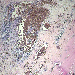

In [29]:
img

In [30]:
x  = image.img_to_array(img)

In [31]:
x

array([[[153., 141., 143.],
        [191., 183., 181.],
        [174., 177., 182.],
        ...,
        [172., 183., 179.],
        [164., 164., 156.],
        [186., 185., 180.]],

       [[102.,  89., 107.],
        [184., 173., 177.],
        [160., 155., 161.],
        ...,
        [151., 139., 139.],
        [159., 154., 161.],
        [180., 169., 167.]],

       [[110., 105., 101.],
        [158., 142., 153.],
        [178., 163., 166.],
        ...,
        [176., 177., 172.],
        [165., 175., 174.],
        [165., 168., 175.]],

       ...,

       [[181., 180., 175.],
        [191., 197., 171.],
        [222., 208., 205.],
        ...,
        [222., 179., 196.],
        [208., 164., 187.],
        [202., 196., 200.]],

       [[214., 215., 209.],
        [194., 189., 185.],
        [215., 207., 196.],
        ...,
        [188., 165., 171.],
        [103.,  74., 104.],
        [162., 155., 163.]],

       [[213., 210., 201.],
        [199., 187., 175.],
        [137., 1

In [32]:
x.ndim

3

In [33]:
x = np.expand_dims(x,axis = 0)

In [37]:
x.ndim

4

In [35]:
pred = np.argmax(model.predict(x), axis=1)

In [36]:
pred

array([0])

In [38]:
index=['benign','malignant']

In [39]:
index[pred[0]]

'benign'

In [40]:
img=image.load_img(r"/home/wsuser/work/breastcancerdataset/test/benign/SOB_B_TA-14-21978AB-40-011.png",target_size=(75,75))
x=image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x), axis=1)
index=['benign','malignant']
print(index[pred[0]])

benign


# IBM Deployment

In [41]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 11.1 MB/s eta 0:00:01


In [81]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"uFEEmbLdZ_Jk9I8q_rCnBaSuG1kcaIUqZHZm-AP7rLMD"
}

In [82]:
client=APIClient(wml_credentials)

In [83]:
client

In [89]:
def guid_space_name(client,sudharshan):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==sudharshan)['metadata']['id'])

In [90]:
space_uid=guid_space_name(client,'sudharshan')
print(space_uid)

660b666c-5203-446a-a2ae-325f53e5873e


In [91]:
client.set.default_space(space_uid)

'SUCCESS'

In [93]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [94]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [95]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [96]:
ls

ibmbreastcancer.h5  test/  train/


In [100]:
!tar -zcvf ibmbreastcancer.tgz ibmbreastcancer.h5

ibmbreastcancer.h5


In [101]:
ls

animal.tgz  ibmbreastcancer.h5  ibmbreastcancer.tgz  test/  train/


In [102]:
import tensorflow as tf
tf.__version__

'2.7.2'

In [104]:
model_details=client.repository.store_model(model='ibmbreastcancer.tgz',
                                           meta_props={
                                              client.repository.ModelMetaNames.NAME:"CNN Model",
                                              client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",      
                                              client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid 
})

In [105]:
model_id=client.repository.get_model_id(model_details)

In [106]:
model_id

'3bc44d36-1ca5-4396-bde1-3ae4bad102d9'

In [111]:
ls

animal.tgz               ibmbreastcancer.h5   test/
ibmbreastcancer_cnn.tgz  ibmbreastcancer.tgz  train/


In [121]:
client.repository.download('3bc44d36-1ca5-4396-bde1-3ae4bad102d9','ibmbreastcancercnn.tgz')

Successfully saved model content to file: 'ibmbreastcancercnn.tgz'


'/home/wsuser/work/breastcancerdataset/ibmbreastcancercnn.tgz'

In [1]:
ls

In [125]:
pwd

'/home/wsuser/work/breastcancerdataset'